In [1]:
%matplotlib inline
#주피터 노트북 상에 그래프를 표현하기 위한 명령
#pycharm에서는 1 line code 없이 그래프 띄울 때마다 plt.show()를 입력하면됨

import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [4]:
data = pd.read_csv('../data/uber-raw-data-apr14.csv')
data.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

# 문자크게 적기

In [6]:
pd.to_datetime(data['Date/Time']).head()

0   2014-04-01 00:11:00
1   2014-04-01 00:17:00
2   2014-04-01 00:21:00
3   2014-04-01 00:28:00
4   2014-04-01 00:33:00
Name: Date/Time, dtype: datetime64[ns]

In [9]:
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)
#pd.to_datetime : 해당 컬럼을 datetime 형태로 변한시키기
#map function : built-in 함수 , list/dictionary 같이 iterable한 데이터를 인자로 받아 list안의 개별 iterable 데이터로 변경

In [10]:
data.head()

Date/Time      Lat      Lon    Base
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512

In [11]:
def add_two_int(x,y):
    value = x + y
    return value

add_two_int(1,2)

3

In [14]:
def get_day(dt):                    #일을 가져오는 함수
    return dt.day

data['date'] = data['Date/Time'].map(get_day)

In [17]:
data.head()

Date/Time      Lat      Lon    Base  date
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512     1
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512     1
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512     1
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512     1
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512     1

In [20]:
def get_wkday(dt):
    return dt.weekday()

def get_hour(dt):
    return dt.hour

data['weekday'] = data['Date/Time'].map(get_wkday)
data['hour'] = data['Date/Time'].map(get_hour)

In [23]:
data.tail()

Date/Time      Lat      Lon    Base  date  weekday  hour
564511 2014-04-30 23:22:00  40.7640 -73.9744  B02764    30        2    23
564512 2014-04-30 23:26:00  40.7629 -73.9672  B02764    30        2    23
564513 2014-04-30 23:31:00  40.7443 -73.9889  B02764    30        2    23
564514 2014-04-30 23:32:00  40.6756 -73.9405  B02764    30        2    23
564515 2014-04-30 23:48:00  40.6880 -73.9608  B02764    30        2    23

In [24]:
data.describe()

Lat            Lon           date       weekday  \
count  564516.000000  564516.000000  564516.000000  564516.00000   
mean       40.740005     -73.976817      16.117127       2.86698   
std         0.036083       0.050426       9.048139       1.82081   
min        40.072900     -74.773300       1.000000       0.00000   
25%        40.722500     -73.997700       8.000000       1.00000   
50%        40.742500     -73.984800      16.000000       3.00000   
75%        40.760700     -73.970000      24.000000       4.00000   
max        42.116600     -72.066600      30.000000       6.00000   

                hour  
count  564516.000000  
mean       14.465043  
std         5.873925  
min         0.000000  
25%        10.000000  
50%        16.000000  
75%        19.000000  
max        23.000000

In [25]:
import matplotlib.pyplot as plt

Text(0.5,1,'Frequency by day of monyh -uber -Apr 2014')

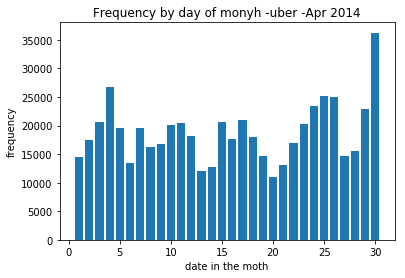

In [29]:
plt.hist(data.date, bins = 30, rwidth =.8, range=(.5,30.5))
plt.xlabel('date in the moth')
plt.ylabel('frequency')
plt.title('Frequency by day of monyh -uber -Apr 2014')

In [33]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('date').apply(count_rows)
by_date

date
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [38]:
by_date_sorted = by_date.sort_values()
by_date_sorted

date
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

In [39]:
plt.bar(range(1,31), by_date_sorted)
plt.xticks(range(1,31), by_date_sorted.index)
plt.xlabel('date in the moth')
plt.ylabel('frequency')
plt.title('Frequency by day of monyh -uber -Apr 2014')

Text(0.5,1,'Frequency by day of monyh -uber -Apr 2014')

(array([11910.,  7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924.,
        22843., 17939., 17865., 18774., 19425., 22603., 27190., 35324.,
        42003., 45475., 43003., 38923., 36244., 36964., 30645., 20649.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.]),
 <a list of 24 Patch objects>)

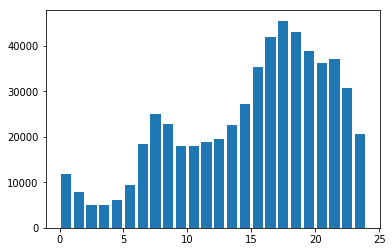

In [41]:
plt.hist(data.hour, bins = 24, rwidth =0.8 ,range=(0,24))

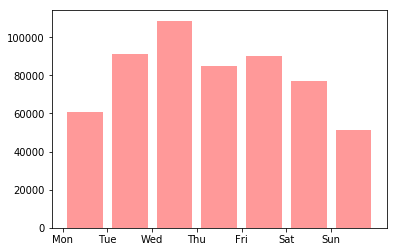

In [46]:
plt.hist(data.weekday, bins = 7, rwidth =0.8 ,range=(0,7) , color = 'red', alpha=0.4)  #alpha =투명도
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split());